# Homework 3 - Thomas Cowart

## 1)

### A. Importing the necessary libraries and loading the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# a. Import the dataset
student_performance = pd.read_csv('Student_Performance.csv')

# Display the first few rows to understand the structure
print(student_performance.head())

   Student_ID           Name  Age Gender                Major  \
0         101  Alice Johnson   21      F  Information Systems   
1         102      Bob Smith   22      M          Mathematics   
2         103  Charlie Davis   23      M  Information Systems   
3         104   Diana Miller   21      F              Physics   
4         105    Evan Garcia   22      M  Information Systems   

              Course  Credits  Attendance  Midterm_Grade  Final_Grade  \
0   Data Science 101        3          95             88           93   
1         Calculus I        4          80             92           89   
2    Data Structures        3          55             65           58   
3  Quantum Mechanics        4          75             79           80   
4   Data Science 101        3          60             85           86   

   Assignment_Completion  Participation Passed  
0                    100              9    Yes  
1                     90              8    Yes  
2                     4

### B. Names and IDs of 21-year-old Information Systems majors

In [ ]:
#b. Filter students who are 21 years old and majoring in Information Systems
is_students_21 = student_performance[(student_performance['Age'] == 21) & 
                                    (student_performance['Major'] == 'Information Systems')]

# Select only the Name and Student_ID columns
result_b = is_students_21[['Name', 'Student_ID']]
print("\nNames and IDs of 21-year-old Information Systems majors:")
print(result_b)


Names and IDs of 21-year-old Information Systems majors:
              Name  Student_ID
0    Alice Johnson         101
7       Hannah Kim         108
16   Charlie Davis         117
36    Jackie Clark         137
43   Charlie Davis         144
47    George Brown         148
88   Alice Johnson         189
100  Charlie Davis         201
101  Alice Johnson         202
115    Evan Garcia         216
127   George Brown         228
146     Ian Wright         247
155  Alice Johnson         256
163     Hannah Kim         264
174  Alice Johnson         275
177   Diana Miller         278


### C. Number of students who passed Data Science 101

In [7]:
# Filter students who took Data Science 101 and passed
data_science_passed = student_performance[(student_performance['Course'] == 'Data Science 101') & 
                                         (student_performance['Passed'] == 'Yes')]

# Count the number of students
count_passed = len(data_science_passed)
print(f"\nNumber of students who passed Data Science 101: {count_passed}")


Number of students who passed Data Science 101: 37


### D. Student with highest midterm grade in Data Structures

In [8]:
# Filter students who took Data Structures
data_structures_students = student_performance[student_performance['Course'] == 'Data Structures']

# Find the student with the highest midterm grade
highest_midterm = data_structures_students.loc[data_structures_students['Midterm_Grade'].idxmax()]
print(f"\nStudent with highest midterm grade in Data Structures: {highest_midterm['Name']} with a grade of {highest_midterm['Midterm_Grade']}")


Student with highest midterm grade in Data Structures: Bob Smith with a grade of 99


### E. Histogram of midterm grades

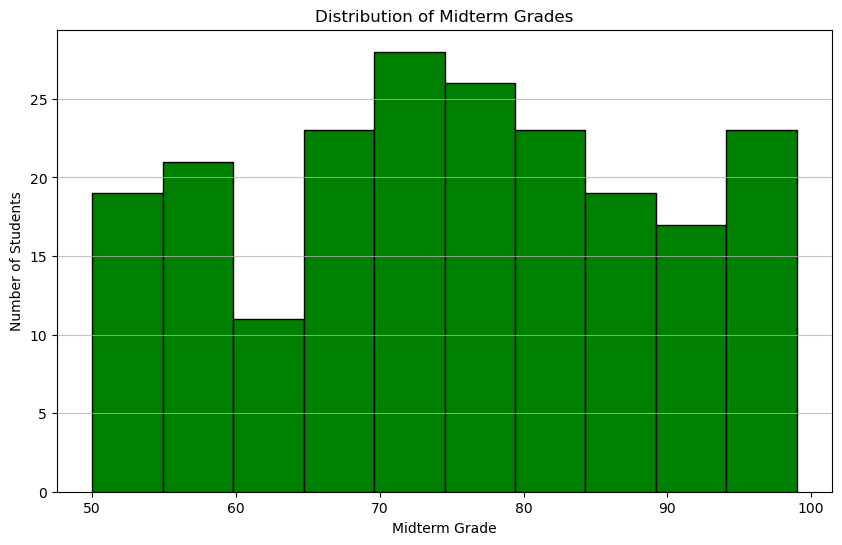

In [10]:
# Create a histogram of midterm grades
plt.figure(figsize=(10, 6))
plt.hist(student_performance['Midterm_Grade'], bins=10, color='green', edgecolor='black')
plt.title('Distribution of Midterm Grades')
plt.xlabel('Midterm Grade')
plt.ylabel('Number of Students')
plt.grid(axis='y', alpha=0.75)
plt.show()

### F. Add At_Risk column

In [11]:
# Define the criteria for "At Risk" students
student_performance['At_Risk'] = (student_performance['Attendance'] < 60) & (student_performance['Assignment_Completion'] < 50)

# Display the first few rows with the new column
print("\nDataFrame with At_Risk column:")
print(student_performance.head())


DataFrame with At_Risk column:
   Student_ID           Name  Age Gender                Major  \
0         101  Alice Johnson   21      F  Information Systems   
1         102      Bob Smith   22      M          Mathematics   
2         103  Charlie Davis   23      M  Information Systems   
3         104   Diana Miller   21      F              Physics   
4         105    Evan Garcia   22      M  Information Systems   

              Course  Credits  Attendance  Midterm_Grade  Final_Grade  \
0   Data Science 101        3          95             88           93   
1         Calculus I        4          80             92           89   
2    Data Structures        3          55             65           58   
3  Quantum Mechanics        4          75             79           80   
4   Data Science 101        3          60             85           86   

   Assignment_Completion  Participation Passed  At_Risk  
0                    100              9    Yes    False  
1                     

### G. Save Updated DataFrame

In [12]:
# Define the criteria for "At Risk" students
student_performance['At_Risk'] = (student_performance['Attendance'] < 60) & (student_performance['Assignment_Completion'] < 50)

# Display the first few rows with the new column
print("\nDataFrame with At_Risk column:")
print(student_performance.head())


DataFrame with At_Risk column:
   Student_ID           Name  Age Gender                Major  \
0         101  Alice Johnson   21      F  Information Systems   
1         102      Bob Smith   22      M          Mathematics   
2         103  Charlie Davis   23      M  Information Systems   
3         104   Diana Miller   21      F              Physics   
4         105    Evan Garcia   22      M  Information Systems   

              Course  Credits  Attendance  Midterm_Grade  Final_Grade  \
0   Data Science 101        3          95             88           93   
1         Calculus I        4          80             92           89   
2    Data Structures        3          55             65           58   
3  Quantum Mechanics        4          75             79           80   
4   Data Science 101        3          60             85           86   

   Assignment_Completion  Participation Passed  At_Risk  
0                    100              9    Yes    False  
1                     

## 2)

### A. Create IS_Students DataFrame

In [13]:
# Create a DataFrame with only Information Systems students
is_students = student_performance[student_performance['Major'] == 'Information Systems'].copy()

# Set Student_ID as index and drop Student_ID and Major columns
IS_Students = is_students.set_index('Student_ID')
IS_Students = IS_Students.drop('Major', axis=1)

print("\nIS_Students DataFrame:")
print(IS_Students.head())


IS_Students DataFrame:
                     Name  Age Gender            Course  Credits  Attendance  \
Student_ID                                                                     
101         Alice Johnson   21      F  Data Science 101        3          95   
103         Charlie Davis   23      M   Data Structures        3          55   
105           Evan Garcia   22      M  Data Science 101        3          60   
108            Hannah Kim   21      F   Data Structures        3          40   
110          Jackie Clark   22      F  Data Science 101        3          92   

            Midterm_Grade  Final_Grade  Assignment_Completion  Participation  \
Student_ID                                                                     
101                    88           93                    100              9   
103                    65           58                     45              5   
105                    85           86                     60              6   
108            

### B. Name of student with ID 271

In [14]:
# Find the name of student with ID 271
try:
    student_271 = IS_Students.loc[271, 'Name']
    print(f"\nName of student with ID 271: {student_271}")
except KeyError:
    print("\nStudent with ID 271 not found in Information Systems major")


Name of student with ID 271: Fiona Lee


### C. Average final grade for students with high assignment completion

In [15]:
# Calculate average final grade for students who completed more than 80% of assignments
high_completion = IS_Students[IS_Students['Assignment_Completion'] > 80]
avg_final_grade = high_completion['Final_Grade'].mean()
print(f"\nAverage final grade for IS students with >80% assignment completion: {avg_final_grade:.2f}")


Average final grade for IS students with >80% assignment completion: 76.77


### D. Compare participation scores of highest and lowest midterm performers

In [16]:
# Find the student with the highest midterm grade
highest_midterm_student = IS_Students.loc[IS_Students['Midterm_Grade'].idxmax()]

# Find the student with the lowest midterm grade
lowest_midterm_student = IS_Students.loc[IS_Students['Midterm_Grade'].idxmin()]

print("\nComparison of participation scores:")
print(f"Student with highest midterm ({highest_midterm_student['Name']}): {highest_midterm_student['Participation']}")
print(f"Student with lowest midterm ({lowest_midterm_student['Name']}): {lowest_midterm_student['Participation']}")

# Compare who has the higher participation score
if highest_midterm_student['Participation'] > lowest_midterm_student['Participation']:
    print(f"{highest_midterm_student['Name']} has the higher participation score")
elif highest_midterm_student['Participation'] < lowest_midterm_student['Participation']:
    print(f"{lowest_midterm_student['Name']} has the higher participation score")
else:
    print("Both students have the same participation score")


Comparison of participation scores:
Student with highest midterm (Alice Johnson): 6
Student with lowest midterm (Diana Miller): 9
Diana Miller has the higher participation score


### E. Violin plot for participation distribution by risk status

/Users/thomascowart/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thomascowart/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thomascowart/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


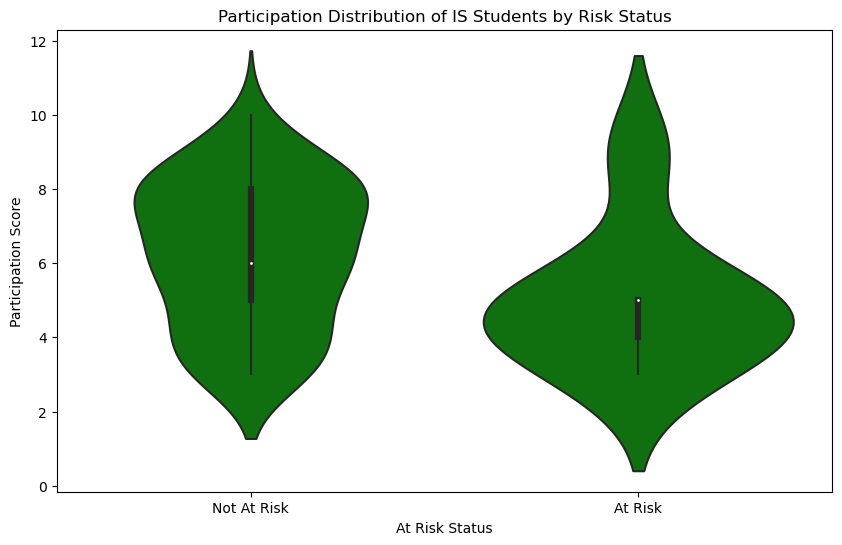

In [21]:
# Create a violin plot to compare participation distribution by risk status
plt.figure(figsize=(10, 6))
sns.violinplot(x='At_Risk', y='Participation', data=IS_Students, color='green')
plt.title('Participation Distribution of IS Students by Risk Status')
plt.xlabel('At Risk Status')
plt.ylabel('Participation Score')
plt.xticks([0, 1], ['Not At Risk', 'At Risk'])
plt.show()